In [76]:
from matplotlib import pyplot as plt
from matplotlib import axes
from matplotlib import pyplot
import pandas as pd
import numpy as np
import math
from scipy import stats
import csv
import statistics

from collections import Counter
from collections import defaultdict

result_path = "./KEY/"
df=pd.read_csv(result_path + "final_meta_all_processed - no other.csv")

ref = {"Creation":"CREAT",
       "Participation":"PART",
       "Connection_comment":"CXN-SP", 
       "Connection_game":"CXN-GAM"}

stats=["celebrity", "professional", "amateur"]
df.head()


,video_id,title,video_length,publish_at,category_id,category,language,live_content,description,tags,...,merged_tagging,quality,creativity,awareness,mrbeast,arborday,teamtrees_org,noteble_youtuber,noteble_entrepreneur,mention_count
0,0hVZOJCYBBM,Important Youtube Announcement (please watch),155,2019-12-28T21:00:06.000Z,24,Entertainment,en,none,I CAN'T BELIEVE WE REACHED OUR GOAL!!!!! YOU G...,NaN,...,Connection,4.666667,4.333333,4.333333,y,y,y,n,n,3
1,ZNz_tE5VgCY,"Generations React To MrBeast Planting 20,000,0...",838,2019-10-25T20:55:13.000Z,24,Entertainment,en,none,Support #TeamTrees with us by hitting the DONA...,"""generations react"",""kids react"",""teens react""...",...,Connection,2.666667,2.333333,4.666667,y,y,y,y,n,4
2,Kv3cYKCUoKM,I Planted INFINITE TREES in Minecraft Hardcore...,1992,2019-10-27T19:45:14.000Z,20,Gaming,en,none,sub pls : http://bit.ly/TxtGm8\r\nDonate to Pl...,"""Minecraft"",""dantdm"",""dan tdm"",""tdm"",""dan"",""fu...",...,Connection,4.000000,3.666667,4.000000,y,n,y,n,n,2
3,lHsymdFIu0U,"The Moment @MrBeast, @Mark Rober and TeamTrees...",155,2019-12-19T22:48:33.000Z,26,Howto & Style,en,none,💲💲💲HOW TO DONATE TO #TEAMTREES💲💲💲\r\nThe most ...,"""#TeamTrees"",""TeamTrees"",""Team Trees"",""teamtre...",...,Connection,4.333333,4.333333,3.666667,y,n,y,n,y,3
4,Pm9rxDSArhQ,"The Moment Elon Musk Donated $1,000,000 to Tea...",109,2019-10-30T02:38:38.000Z,26,Howto & Style,en,none,💲💲💲HOW TO DONATE TO #TEAMTREES💲💲💲\r\nThe most ...,"""#TeamTrees"",""TeamTrees"",""Team Trees"",""teamtre...",...,Connection,3.666667,3.000000,3.333333,y,y,y,n,y,4


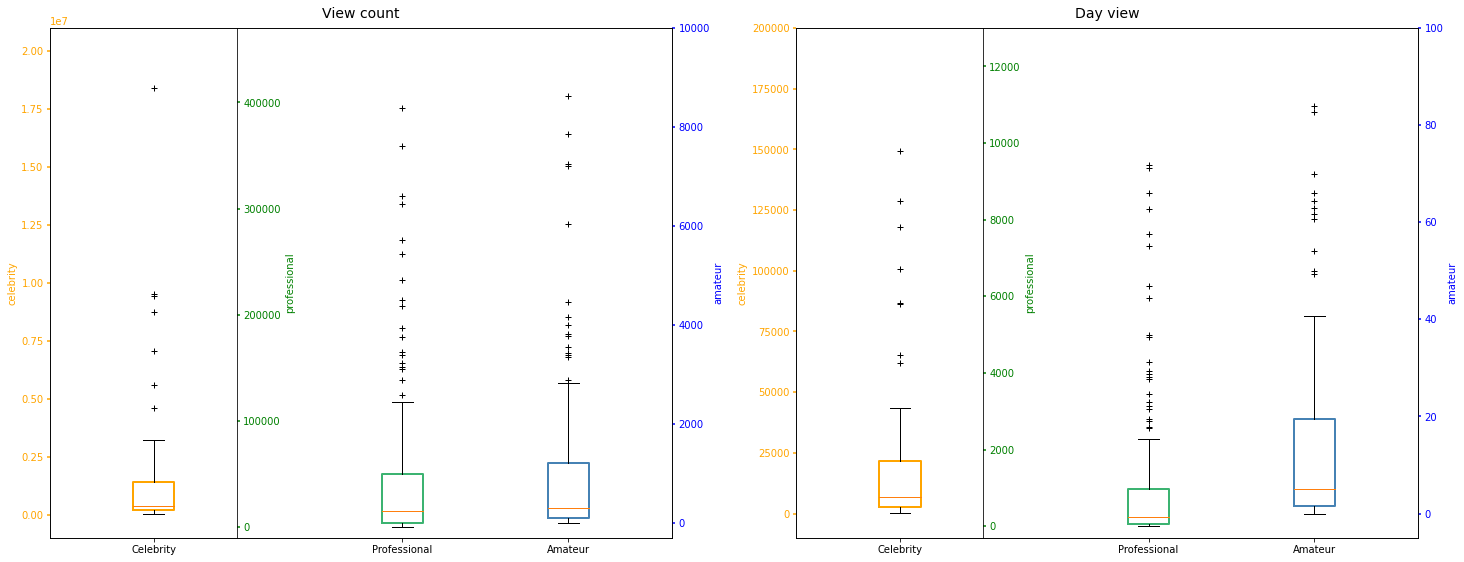

In [80]:
x_ticks = ["Celebrity", "Professional", "Amateur"]
colors = ["orange", "mediumseagreen", "steelblue"]
colors_ticks = ["orange", "green", "blue"]
star_size=14  

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def sub_fig_multiy(field, y_range1, y_range2, y_range3):
    shift=(0,5,10)
    t=0
    bps=[]
    pos = [1, 2.2, 3]
    
    p0, p1, p2 = None, None, None
    plot_var = [p0, p1, p2]

    par1 = host.twinx()
    par2 = host.twinx()
    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par1.spines["right"].set_position(("axes", .3))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par1)
    # Second, show the right spine.
    par1.spines["right"].set_visible(True)
    plots = [host, par1, par2]
    tkw = dict(size=3, width=1.5)
    
    for st in stats: # for each group
        data=[]
        s=df.loc[(df.status==st)][field]
        data.append(s)
        boxprops = dict(linestyle='-', linewidth=2, color=colors[t], label = x_ticks[t])
        plot_var[t]=plots[t].boxplot(data, sym='+', positions=[pos[t]], vert=1,
                                     whis=1.5,widths=0.2, boxprops=boxprops)
        bps.append(plot_var[t])
        plots[t].set_ylabel(st)
        plots[t].yaxis.label.set_color(colors_ticks[t])
        plots[t].tick_params(axis='y', colors=colors_ticks[t], **tkw)
        t+=1 
    host.set_ylim(y_range1)
    par1.set_ylim(y_range2)
    par2.set_ylim(y_range3)
    plt.xticks([1,2.2,3], x_ticks, fontsize=star_size)
#     host.legend([bp["boxes"][0] for bp in bps], stats, loc='upper left',mode="expand",ncol=3)


plt.figure(figsize=(8,6))
host= plt.subplot(1,2,1)
sub_fig_multiy("vw_ct", (-1e6,21e6), (-.1e5, 4.7e5), (-.3e3, 10e3))
plt.title("View count", fontsize=14, pad = 10)

host=plt.subplot(1,2,2)
sub_fig_multiy("day_vw", (-.1e5,2e5), (-.3e3, 13e3), (-5,100))
plt.title("Day view", fontsize=14, pad = 10)

plt.subplots_adjust(right = 2.5, bottom = -.3)

plt.savefig(result_path + "viz_vwct_dayvw.png", bbox_inches = 'tight')

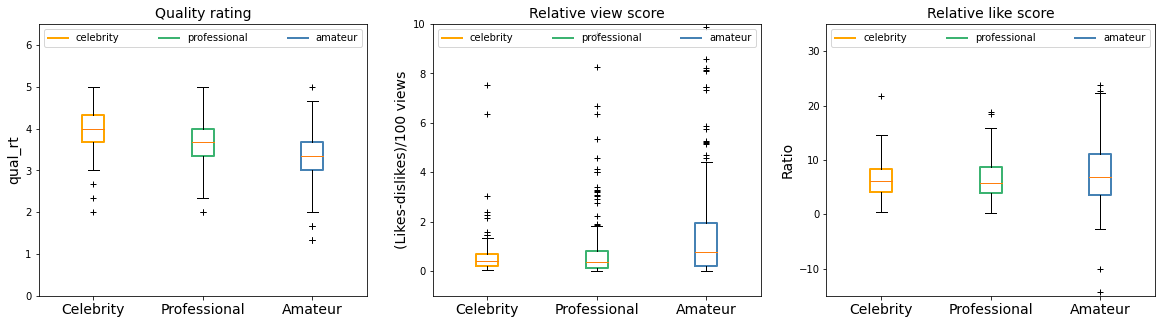

In [78]:
def sub_fig(field, y_range):
    shift=(0,5,10)
    t=0
    bps=[]
    pos = [1]
    for st in stats: # for each group
        data=[]
        s=df.loc[(df.status==st)][field]
        data.append(s)
        boxprops = dict(linestyle='-', linewidth=2, color=colors[t])
        bp=plt.boxplot(data, sym='+', positions=[p+t for p in pos], vert=1, whis=1.5,widths=0.2, boxprops=boxprops)
        bps.append(bp)
        plt.ylim(y_range)
        t+=1  
    plt.xticks([1,2,3], x_ticks, fontsize=star_size)
    ax.legend([bp["boxes"][0] for bp in bps], stats, loc='upper left',mode="expand",ncol=3)
    
plt.figure(figsize=(20,5))
ax=plt.subplot(1,3,1)
sub_fig("quality", (0,6.5))
plt.title("Quality rating", fontsize=14)
plt.ylabel("qual_rt", fontsize=star_size)

ax=plt.subplot(1,3,2)
sub_fig("rel_vw", (-1,10))
plt.title("Relative view score", fontsize=14)
plt.ylabel("(Likes-dislikes)/100 views", fontsize=star_size)

ax=plt.subplot(1,3,3)
sub_fig("rel_like", (-15,35))
plt.title("Relative like score", fontsize=14)
plt.ylabel("Ratio", fontsize=star_size)

plt.savefig(result_path + "viz_popularity.png")